## 앱 방문 데이터 분석

1. 개요

- 새로운 앱이 출시 되었다고 가정 한 후, 출시 후 사용자들의 방문 데이터를 이용하여 사용 패턴을 분석


- EDA
- Visualization
- Statistical Analysis
- Conclusion
- Action Insight

2. Dataset (8 features)

- user_id = unique ID
- provider = 통신사 (S, K, L)
- AB_test = A/B test를 진행한 그룹 (A, B)
- version = 앱 버전 (V1, V2)
- join_date = 가입날짜
- visits = 앱 방문 회수
- avg_loding_time = 평균 앱 로딩타임
- sum_loading_time = 누적 앱 로딩타임

3. 목표

- 그룹간에 방문수의 차이가 존재하는지 확인
- 그룹간에 방문수의 차이가 통신사별로 존재하는지 확인
- 방문수와 다른 features 사이의 관계 모델링


In [25]:
import pandas as pd
import seaborn as sns
# https://seaborn.pydata.org/introduction.html
# pd.options.display.max_rows = 200

In [26]:
df = pd.read_csv("app_data.csv")
df

,user_id,provider,AB_test,version,join_date,visits,sum_loading_time,avg_loading_time
0,66905ff85dea620d017b05bdd3576c65,S,A,V2,2020-03-21,3,7.154498,2.384833
1,57a361b51816befba6736a1c1fc81116,K,B,V1,2020-04-29,7,18.616130,2.659447
2,5c7f3f9b66d74c20597f4c71d30b3bf6,S,B,V2,2020-04-09,3,16.865968,5.621989
3,a4df3d004d5241e65a0e3cda78dd848f,S,A,V2,2020-04-10,23,138.929992,6.040434
4,406b68916f70e82499cb93604a918fbd,K,A,V2,2020-04-29,5,19.824315,3.964863
...,...,...,...,...,...,...,...,...
328468,0e9dd56123a4d2f311215141db764187,L,A,V2,2020-04-26,4,3.638750,0.909687
328469,bf292e39354f58b5247ccc6dd505c886,L,B,V2,2020-04-16,15,33.283471,2.218898
328470,25f9b5e978f818a3af254b299d94f947,L,A,V1,2020-04-17,5,12.573163,2.514633
328471,67bb1922e18c00d82d5555903906bea3,S,A,V2,2020-04-28,6,6.433394,1.072232


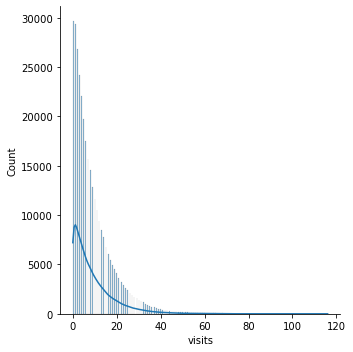

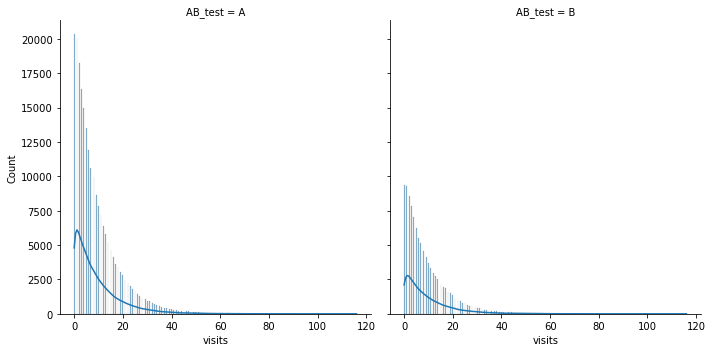

In [34]:
sns.displot(data=df, x="visits", kde=True)
sns.displot(data=df, x="visits", col='AB_test', kde=True)
# sns.jointplot(data=df, x="visits", y="avg_loading_time", hue="AB_test")

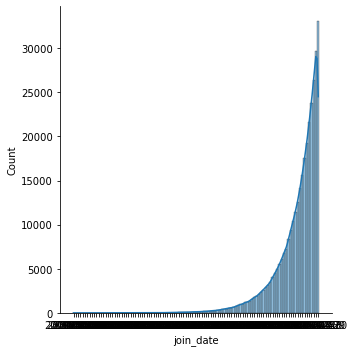

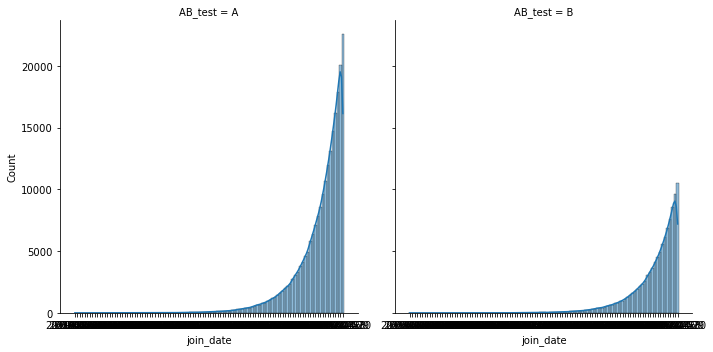

In [35]:
df = df.sort_values(by='join_date')
sns.displot(data=df, x="join_date", kde=True)
sns.displot(data=df, x="join_date", col='AB_test', kde=True)

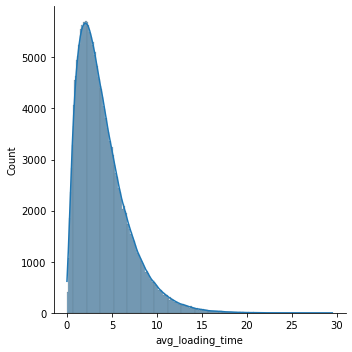

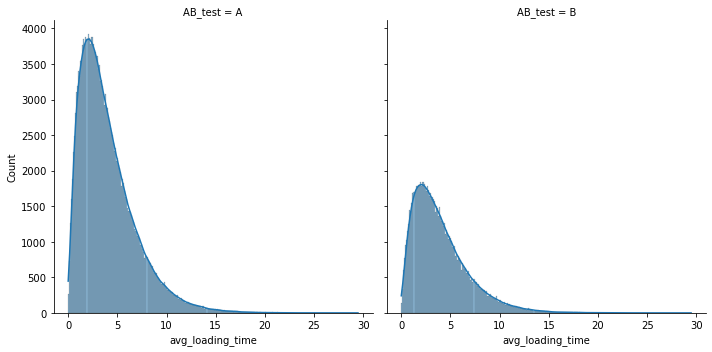

In [36]:
sns.displot(data=df, x="avg_loading_time", kde=True)
sns.displot(data=df, x="avg_loading_time", col='AB_test', kde=True)

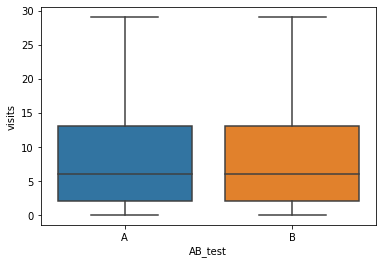

In [28]:
sns.boxplot(data=df, x="AB_test", y="visits", showfliers=False)

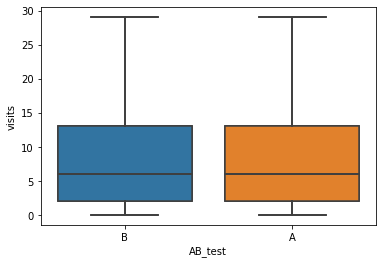

In [29]:
sns.boxplot(data=df[df['provider']=='S'], x="AB_test", y="visits", showfliers=False)

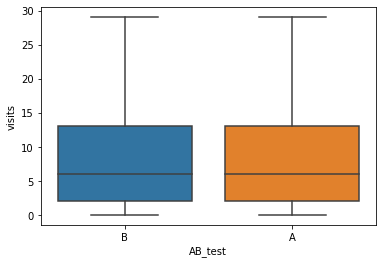

In [30]:
sns.boxplot(data=df[df['provider']=='K'], x="AB_test", y="visits", showfliers=False)

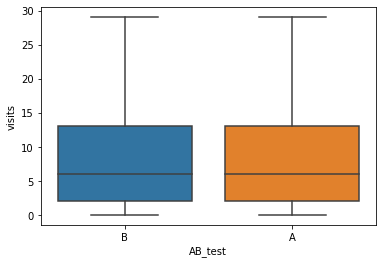

In [31]:
sns.boxplot(data=df[df['provider']=='L'], x="AB_test", y="visits", showfliers=False)

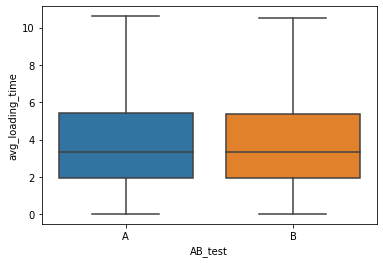

In [37]:
sns.boxplot(data=df, x="AB_test", y="avg_loading_time", showfliers=False)

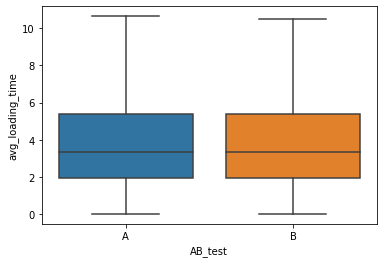

In [41]:
sns.boxplot(data=df[df['provider']=='S'], x="AB_test", y="avg_loading_time", showfliers=False)

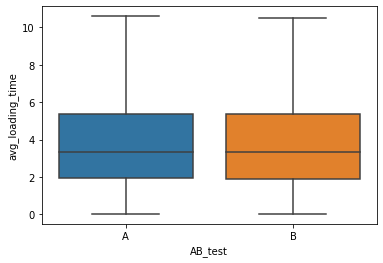

In [42]:
sns.boxplot(data=df[df['provider']=='K'], x="AB_test", y="avg_loading_time", showfliers=False)

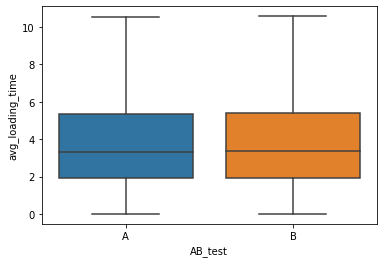

In [43]:
sns.boxplot(data=df[df['provider']=='L'], x="AB_test", y="avg_loading_time", showfliers=False)

In [32]:
# df.visits.value_counts()

In [33]:
# df.join_date.value_counts()

AB TEST 에 대해서 더 공부하고 통게적 차이를 찾는법을 더 찾아보자

그래도 방법이 안나온다면, 정말 그냥 차이가 없는것...

visits 변수는 order가 있는 discrete 변수이다?